In [52]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift
import pyPI as pi

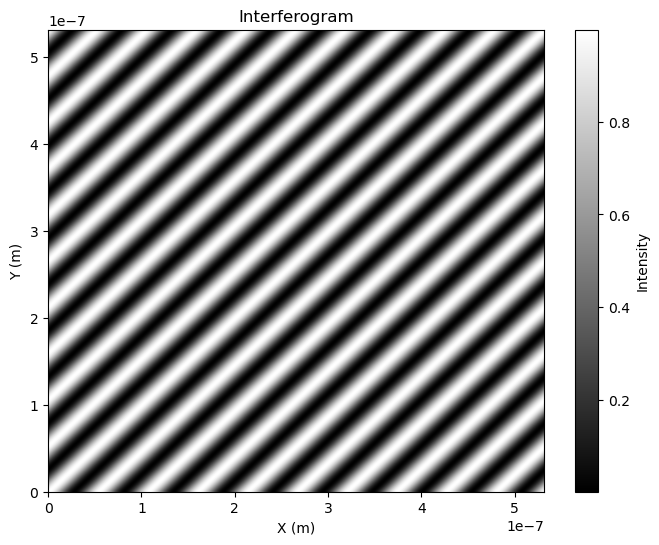

In [53]:
E_r = pi.polarization_basis_set('H')
E_s = pi.polarization_basis_set('L')

info = pi.numeric_intensity(E_r, E_s, n=20, plot=True)

Estimated b: 0.4980392156862745
Estimated m: 0.4980392156862745
Estimated theta: -314159.265 * x


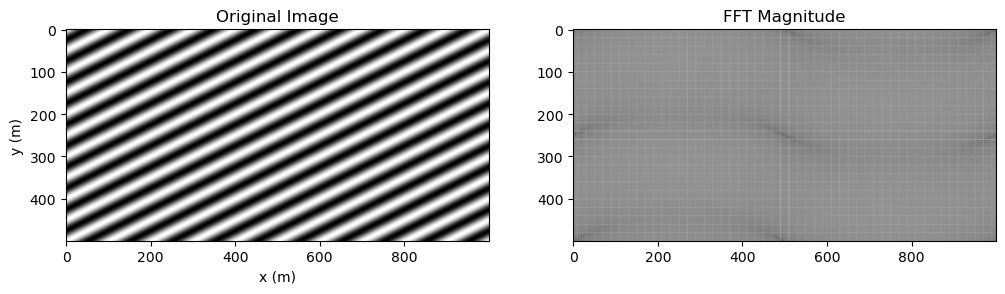

In [57]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift

# Load image
image_path = 'interferogram\\int_2.00_0.71_-0.00.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Normalize image intensity
normalized_image = image / 255.0

# Estimate background intensity (b) as the mean value
b = np.mean(normalized_image)

# Estimate modulation (m) as half the difference between max and min values
m = (np.max(normalized_image) - np.min(normalized_image)) / 2

# Perform FFT to analyze frequency components
fft_image = fftshift(fft2(normalized_image))

# Scaling factors for converting pixels to meters
lambda_ = 532e-9  # Wavelength in meters
k = 2 * np.pi / lambda_  # Wave number
x_size, y_size = image.shape
dx = 10e-6  # Example pixel size in meters (adjust based on calibration)
dy = 10e-6  # Same pixel size assumption

# Create physical coordinate grids
x_pixels = np.arange(x_size)
y_pixels = np.arange(y_size)
X, Y = np.meshgrid(x_pixels, y_pixels)
X_meters = X * dx
Y_meters = Y * dy

# Determine spatial frequency (correcting scaling)
fx = np.fft.fftfreq(image.shape[1], dx)
fy = np.fft.fftfreq(image.shape[0], dy)

# Identify dominant frequency
magnitude_spectrum = np.abs(fft_image)
kx_idx = np.argmax(magnitude_spectrum)
fx_peak = fx[kx_idx % len(fx)]

# Theta calculation
theta = 2 * np.pi * fx_peak

# Display results
print(f"Estimated b: {b}")
print(f"Estimated m: {m}")
print(f"Estimated theta: {theta:.3f} * x")

# Visualize original and FFT image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(normalized_image, cmap='gray')
plt.xlabel("x (m)")
plt.ylabel("y (m)")

plt.subplot(1, 2, 2)
plt.title("FFT Magnitude")
plt.imshow(np.log(magnitude_spectrum), cmap='gray')
plt.show()